# **Part 2: Data Preprocessing**

In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### **Data Exploration**

In [597]:
# Load the dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.info()
diabetes_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [598]:
# Display the statistics of the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [599]:
# Check for unique, missing and duplicated values
inspection_df = pd.DataFrame({
    'Unique': diabetes_df.nunique(),
    'Missing': diabetes_df.isnull().sum(),
    'Type': diabetes_df.dtypes,
    'Sample': diabetes_df.loc[0],
    'Duplicate': diabetes_df.duplicated().sum()
})
inspection_df

,Unique,Missing,Type,Sample,Duplicate
Pregnancies,17,0,int64,6.000,0
Glucose,136,0,int64,148.000,0
BloodPressure,47,0,int64,72.000,0
SkinThickness,51,0,int64,35.000,0
Insulin,186,0,int64,0.000,0
BMI,248,0,float64,33.600,0
DiabetesPedigreeFunction,517,0,float64,0.627,0
Age,52,0,int64,50.000,0
Outcome,2,0,int64,1.000,0


In [600]:
# Count the number of 0 values in each feature
columns = diabetes_df.drop(columns=['Outcome']).columns
zero_values = {feature: diabetes_df[feature].where(diabetes_df[feature] == 0).count() for feature in columns}
zero_values_df = pd.DataFrame(zero_values.items(), columns=['Feature', 'Number of 0 values'])
zero_values_df

,Feature,Number of 0 values
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0


In [601]:
# Count the samples for each class in the target variable
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### **Data Visualization**

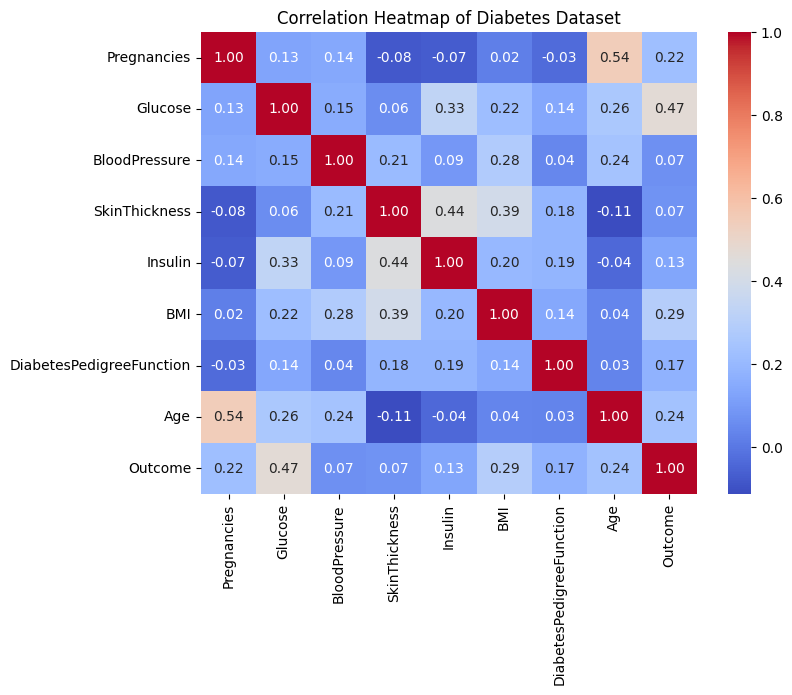

In [602]:
# Visualize the corelation heatmap of the dataset
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

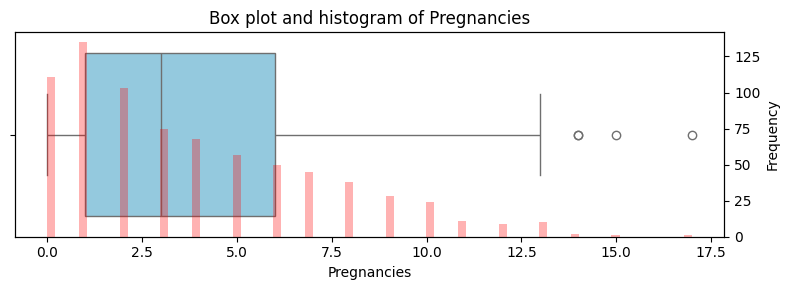

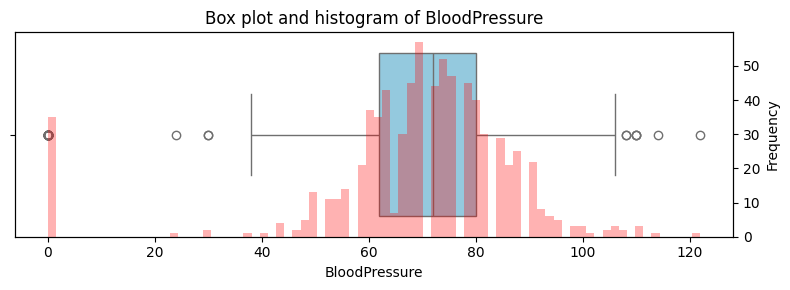

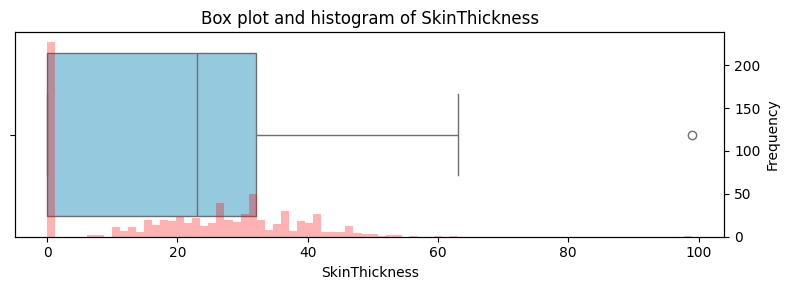

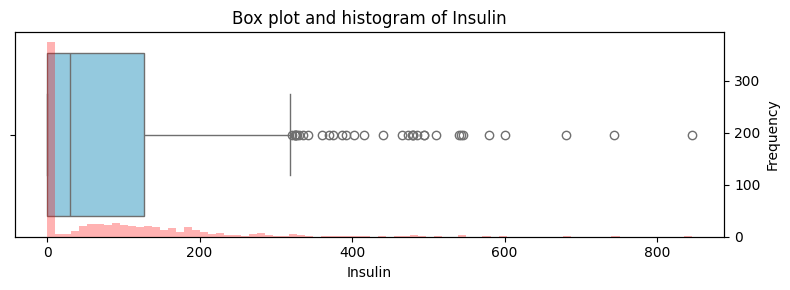

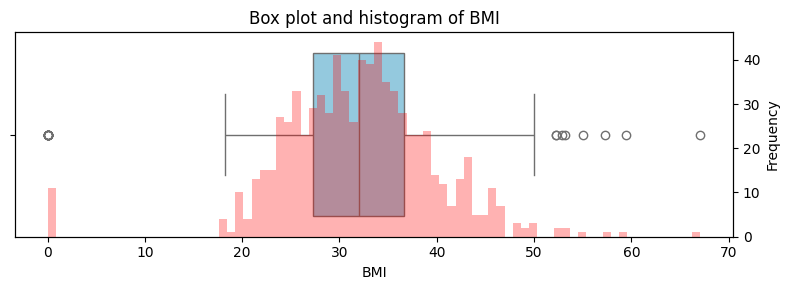

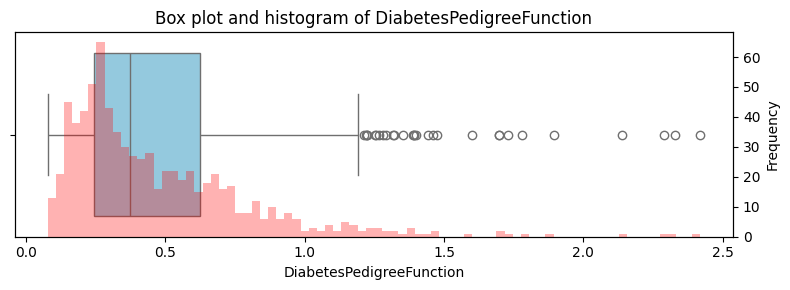

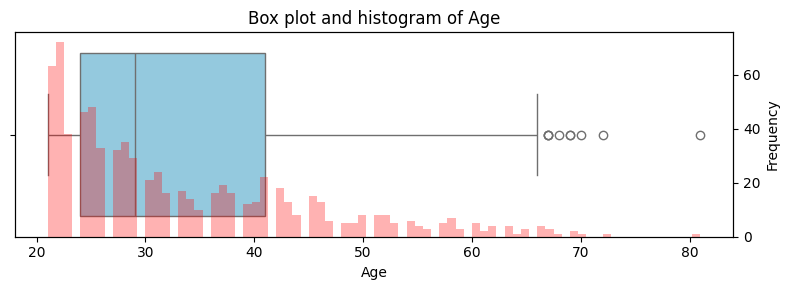

In [603]:
# Select the features with outliers
outliers = ['Pregnancies', 'BloodPressure', 'SkinThickness', 
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Visulize the outliers using box plots and histograms
for feature in outliers:
    fig, ax1 = plt.subplots(figsize=(8, 3))
    
    sns.boxplot(x=diabetes_df[feature], ax=ax1, color='skyblue')
    ax1.set_title(f'Box plot and histogram of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_yticklabels([])
    
    ax2 = ax1.twinx()
    sns.histplot(diabetes_df[feature], bins=80, ax=ax2, color='red', alpha=0.3, edgecolor=None)
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

### **Data Preprocessing**

In [604]:
# Select the features with invalid zero-values
col_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN and then fill NaN with the mean of the column
for column in col_with_zero:
    diabetes_df[column] = diabetes_df[column].replace(0, np.nan)
    
for column in col_with_zero:
    diabetes_df[column] = diabetes_df[column].fillna(diabetes_df[column].mean())

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [605]:
# Standardize the numerical features except the target variable since it is binary
columns = diabetes_df.drop(columns='Outcome').columns

std_scaler = StandardScaler()
diabetes_df[columns] = std_scaler.fit_transform(diabetes_df[columns])
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


### **Model Training**

In [606]:
# Split the dataset into features and target variable
X = diabetes_df.drop(columns='Outcome')
y = diabetes_df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_shape = pd.DataFrame({
    'Training' : (X_train.shape[0], y_train.shape[0]),
    'Testing' : (X_test.shape[0], y_test.shape[0]),
    'Total' : (X.shape[0], y.shape[0])
})
train_test_shape

,Training,Testing,Total
0,614,154,768
1,614,154,768


In [607]:
# Initialize the base classifiers for the ensemble models
base_lr = LogisticRegression(random_state=42)
base_dt = DecisionTreeClassifier(random_state=42)
base_knn = KNeighborsClassifier()
base_svm = SVC(probability=True, random_state=42)

In [608]:
# Train a Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [609]:
# Train a Decision Tree Classifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [610]:
# Train a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [611]:
# Train a Support Vector Classifier
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [612]:
# Train a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [613]:
# Train a Bagging Classifier
bagging = BaggingClassifier(estimator=base_lr, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(random_state=42),
                  random_state=42)

In [614]:
# Train an Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [615]:
# Train an AdaBoost Classifier
adaboost = AdaBoostClassifier(algorithm='SAMME', random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [616]:
# Train a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [617]:
# Train a Voting Classifier
voting = VotingClassifier(estimators=[('lr', base_lr), ('dt', base_dt), ('knn', base_knn), ('svm', base_svm)], voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [618]:
# Train a Stacking Classifier
stacking = StackingClassifier(estimators=[('dt', base_dt), ('knn', base_knn), ('svm', base_svm)], final_estimator=base_lr)
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

### **Model Evaluation**

In [619]:
# Initialize a dictionary to store the models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "K-Nearest Neighbors": knn,
    "Support Vector Machine": svm,
    "Random Forest": random_forest,
    "Bagging": bagging,
    "Extra Trees": extra_trees,
    "AdaBoost": adaboost,
    "Gradient Boosting": gradient_boosting,
    "Voting": voting,
    "Stacking": stacking
}

In [620]:
# Display the evaluation results for each model
eval_results = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred, output_dict=True)
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    eval_results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Cross-Val Score": cv_scores.mean(),
        "Precision (0)": class_report["0"]["precision"],
        "Precision (1)": class_report["1"]["precision"],
        "Recall (0)": class_report["0"]["recall"],
        "Recall (1)": class_report["1"]["recall"]
    })

eval_results_df = pd.DataFrame(eval_results)
eval_results_df

,Model,Train Accuracy,Test Accuracy,Cross-Val Score,Precision (0),Precision (1),Recall (0),Recall (1)
0,Logistic Regression,0.771987,0.753247,0.772159,0.796117,0.666667,0.828283,0.618182
1,Decision Tree,1.000000,0.720779,0.694186,0.785714,0.607143,0.777778,0.618182
2,K-Nearest Neighbors,0.827362,0.740260,0.744852,0.831461,0.615385,0.747475,0.727273
3,Support Vector Machine,0.830619,0.753247,0.751362,0.785047,0.680851,0.848485,0.581818
4,Random Forest,1.000000,0.753247,0.757856,0.808081,0.654545,0.808081,0.654545
5,Bagging,0.770358,0.759740,0.769553,0.798077,0.680000,0.838384,0.618182
6,Extra Trees,1.000000,0.759740,0.763093,0.829787,0.650000,0.787879,0.709091
7,AdaBoost,0.804560,0.753247,0.757830,0.821053,0.644068,0.787879,0.690909
8,Gradient Boosting,0.928339,0.740260,0.769527,0.817204,0.622951,0.767677,0.690909
9,Voting,0.926710,0.740260,0.763102,0.792079,0.641509,0.808081,0.618182


In [622]:
# Display the confusion matrix for the each model
matrix_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    tn, fp, fn, tp = cm.ravel()
    
    matrix_results.append({
        "Model": name,
        "True Positives": tp,
        "True Negatives": tn,
        "False Positives": fp,
        "False Negatives": fn
    })

matrix_results_df = pd.DataFrame(matrix_results)
matrix_results_df

,Model,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression,34,82,17,21
1,Decision Tree,34,77,22,21
2,K-Nearest Neighbors,40,74,25,15
3,Support Vector Machine,32,84,15,23
4,Random Forest,36,80,19,19
5,Bagging,34,83,16,21
6,Extra Trees,39,78,21,16
7,AdaBoost,38,78,21,17
8,Gradient Boosting,38,76,23,17
9,Voting,34,80,19,21


### **Model Visualization**

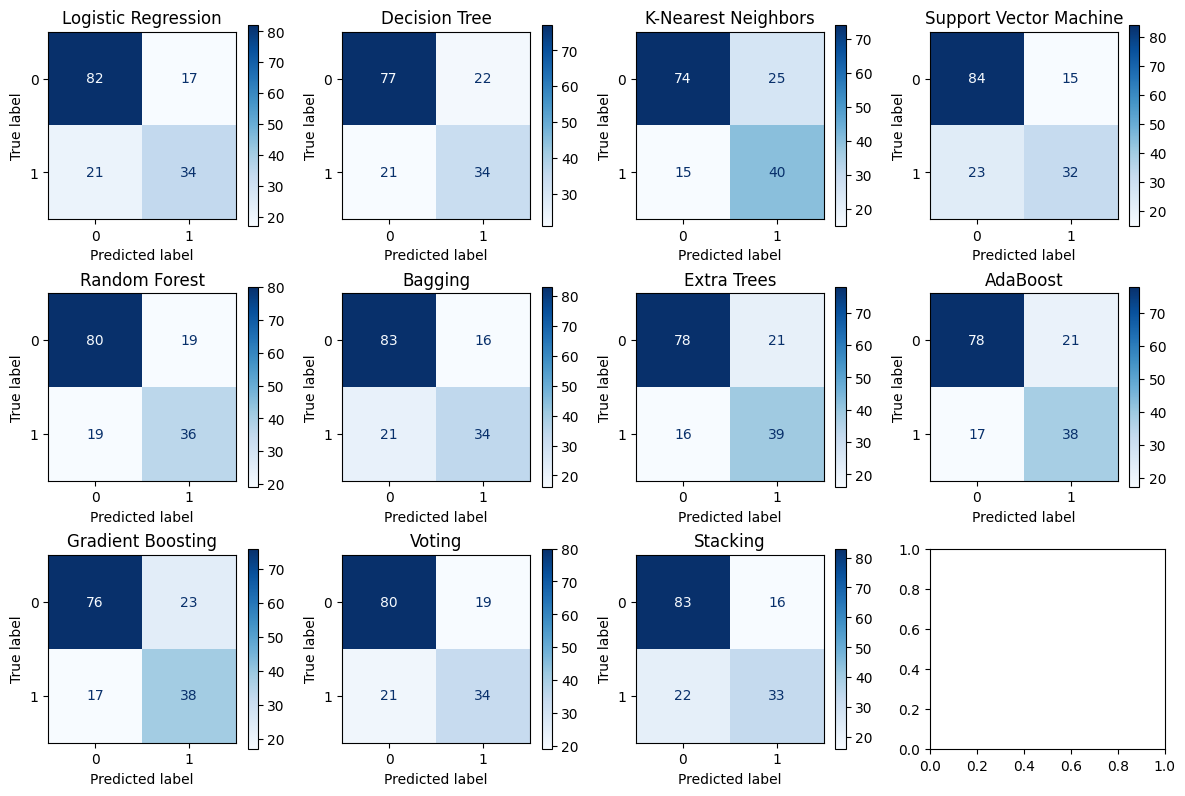

In [623]:
# Visualize the confusion matrices for each model
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    axes[i].set_title(name)

plt.tight_layout()
plt.show()

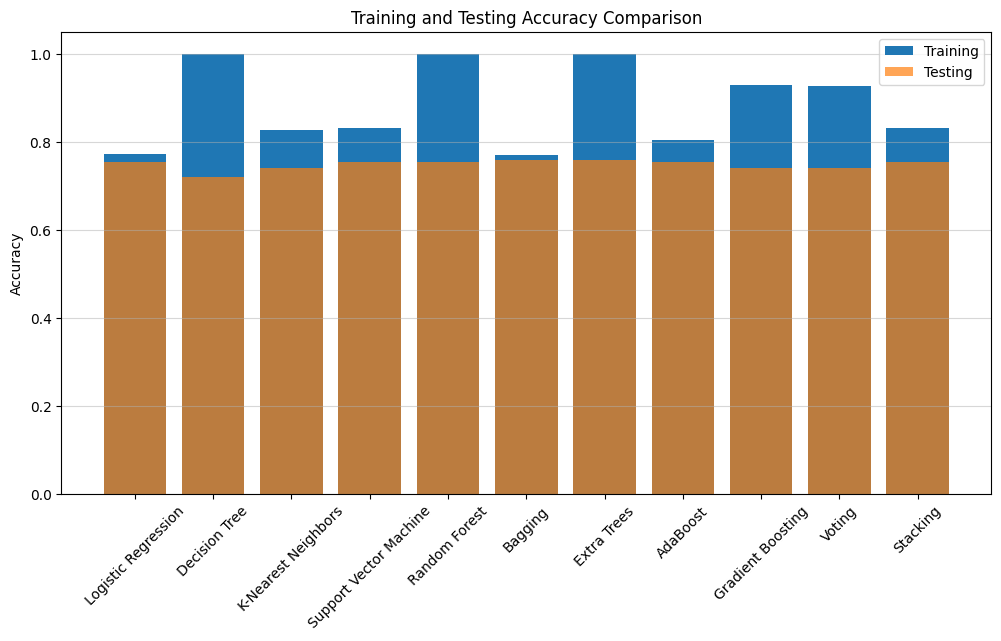

In [626]:
# Visualize the training and testing accuracies of the models
plt.figure(figsize=(12, 6))
plt.bar(eval_results_df["Model"], eval_results_df["Train Accuracy"], label='Training')
plt.bar(eval_results_df["Model"], eval_results_df["Test Accuracy"], alpha=0.7, label='Testing')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.legend()
plt.show()

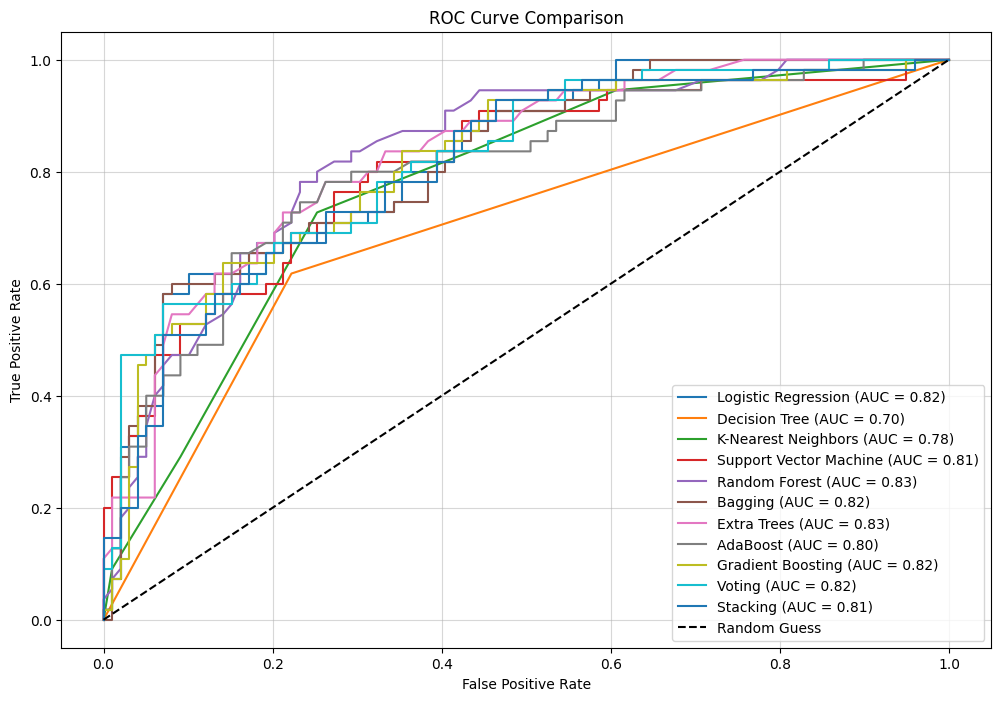

In [625]:
# Visualize the ROC curve and AUC for each model
plt.figure(figsize=(12, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:  # Use decision_function for models like SVC
        y_pred_proba = model.decision_function(X_test)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())  # Normalize

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(alpha=0.5)
plt.show()